# Problema A.2
## Crimen en la Ciudad de México



### Pregunta 1): ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario hacerlas. Sólo describe la prueba y qué te dice cada una.

Primero empezaría por estudiar el tipo de variable en cada columna (categórica, numérica, continua, ordinal, etc) para así poder determinar que tipo de estudios y predicciones se pueden obtener a partir de los datos. También me aseguraría de que el tipo de datos de cada columna sea el correcto y en otro caso caso lo arreglaría ya que no hacerlo podría afectar a la hora de analizar los datos. Después buscaría valores faltantes, repetidos o mal introducidos de cada columna ya que esto nos dice cuantas filas habrá que eliminar en caso de ser valores dentro de columnas que queremos conservar.
Sería útil a su vez determinar la varianza de las columnas numéricas y descartar todas las columnas de varianza nula que no aporten información. Estudiar el rango de valores en cada columna sería el paso siguiente para saber si es necesario normalizar las columnas numéricas.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv('carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv')

In [3]:
raw_data.head()  #Checamos las primeras 5 filas para entender la estructura general de los datos 

ao_hechos  mes_hechos         fecha_hechos  \
0     2017.0  Septiembre  2017-09-30 23:00:00   
1     2017.0  Septiembre  2017-09-30 22:00:00   
2     2017.0      Agosto  2017-08-31 11:43:00   
3     2017.0  Septiembre  2017-09-30 21:15:00   
4     2017.0  Septiembre  2017-09-12 12:00:00   

                            delito              categoria_delito  \
0     ROBO A NEGOCIO CON VIOLENCIA  ROBO A NEGOCIO CON VIOLENCIA   
1  DAÑO EN PROPIEDAD AJENA CULPOSA        DELITO DE BAJO IMPACTO   
2                  ROBO DE OBJETOS        DELITO DE BAJO IMPACTO   
3      HOMICIDIO POR ARMA DE FUEGO              HOMICIDIO DOLOSO   
4               ABUSO DE CONFIANZA        DELITO DE BAJO IMPACTO   

                             fiscalia agencia unidad_investigacion  \
0         INVESTIGACIÓN EN CUAUHTEMOC   CUH-2               UI-2CD   
1  INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2               UI-2CD   
2         INVESTIGACIÓN EN IZTAPALAPA   IZP-4               UI-2SD   
3            INVESTIGACIÓN EN TLAHUAC   TLH-1               UI-2CD   
4         INVESTIGACIÓN EN IZTAPALAPA   IZP-4               UI-2SD   

    alcaldia_hechos                      colonia_hechos  ao_inicio mes_inicio  \
0        CUAUHTEMOC                              JUÁREZ     2017.0    Octubre   
1  GUSTAVO A MADERO  RESIDENCIAL ACUEDUCTO DE GUADALUPE     2017.0    Octubre   
2        IZTAPALAPA         LEYES DE REFORMA 3A SECCIÓN     2017.0    Octubre   
3           TLAHUAC                           LA HABANA     2017.0    Octubre   
4        IZTAPALAPA                      REAL DEL MORAL     2017.0    Octubre   

          fecha_inicio             calle_hechos           calle_hechos2  \
0  2017-10-01 00:12:26    VERSALLES Y  MARSELLA                     NaN   
1  2017-10-01 00:40:28                   BRISAS           DESEMBOCADURA   
2  2017-10-01 00:47:11        GUERRA DE REFORMA  BATALLA DE CALPULALPAN   
3  2017-10-01 00:47:53           MIGUEL HIDALGO                     NaN   
4  2017-10-01 01:03:50  FERROCARRIL DE RIO FRIO                     NaN   

    longitud    latitud                      geopoint  
0 -99.155905  19.426970   19.426970385,-99.1559051339  
1 -99.147345  19.525971  19.5259710139,-99.1473450714  
2 -99.068851  19.382600  19.3825998321,-99.0688509212  
3 -98.996337  19.267774  19.2677742376,-98.9963370068  
4 -99.080072  19.390447  19.3904466893,-99.0800721114

In [4]:
raw_data.info()  #Información sobre las distintas columnas de raw_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016445 entries, 0 to 1016444
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ao_hechos             1016046 non-null  float64
 1   mes_hechos            1016046 non-null  object 
 2   fecha_hechos          1016308 non-null  object 
 3   delito                1016445 non-null  object 
 4   categoria_delito      1016445 non-null  object 
 5   fiscalia              1016445 non-null  object 
 6   agencia               1016445 non-null  object 
 7   unidad_investigacion  1016219 non-null  object 
 8   alcaldia_hechos       1013346 non-null  object 
 9   colonia_hechos        975533 non-null   object 
 10  ao_inicio             1016444 non-null  float64
 11  mes_inicio            1016444 non-null  object 
 12  fecha_inicio          1016444 non-null  object 
 13  calle_hechos          1013723 non-null  object 
 14  calle_hechos2         404276 non-n

In [5]:
num_rows = raw_data.shape[0]  #Número de filas
num_columns = raw_data.shape[1]  #Número de columnas
print('Número de filas en raw_data:      '+ str(num_rows)+'\n'+ 'Número de columnas en raw_data:        ' + str(num_columns))

Número de filas en raw_data:      1016445
Número de columnas en raw_data:        18


A excepción de la columna `calle_hechos2`, en todas las columnas restantes los valores faltantes no representan más del 5% de las filas totales, por lo que eliminamos la columna `calle_hechos2` y las filas con valores nulos del conjunto de datos:

In [6]:
raw_data = raw_data.drop(columns = ['calle_hechos2'])
data_na_cleaned = raw_data.dropna(axis = 0).copy()

In [7]:
#Filas restantes después de eliminar filas con valores nulos o faltantes, se perdieron alrededor del 10% de las columnas originales
raw_data.shape[0]

1016445

## Pregunta 2): ¿Cuántos delitos registrados hay en la tabla? ¿Qué rango de tiempo consideran los datos?
 
Para responder a esta pregunta, podemos comenzar observando que la tabla contiene 1,016,445 filas, correspondientes a las carpetas de investigación de los delitos ocurridos entre 1906 y 2020 en CDMX y activas al día 23 de junio de 2020.

In [8]:
año_min = data_na_cleaned['ao_hechos'].min() #Año del delito más antiguo
año_max = data_na_cleaned['ao_hechos'].max() #Año del delito más reciente
raw_data['ao_hechos'].min()

print('Año del delito más antiguo: '+str(int(año_min)))
print('Año del delito más reciente: '+str(int(año_max)))

Año del delito más antiguo: 1906
Año del delito más reciente: 2020


Sin embargo, este número tan grande de delitos reportados no parece ser correcto, incluso en una ciudad tan grande y delictiva como lo es CDMX; una de las razones de que haya tantas filas se debe a que hay filas repetidas para una misma fecha, y uno esperaría que para una fecha, hora y minuto dados ocurriesen uno o pocos delitos a lo mucho y no decenas o cientos de ellos (en la mayoría de las fechas se tiene una resolución de horas y en bastantes casos de solo días):

In [9]:
data_na_cleaned['fecha_hechos'].value_counts()  #Muchas filas con la misma fecha
                                                #La hora 12:00:00 no es significativa y seguramente es solo un placeholder en la mayoría de los casos

2017-10-16 12:00:00    220
2016-01-01 12:00:00    129
2016-03-01 12:00:00    119
2016-06-01 12:00:00    114
2016-01-15 12:00:00    112
                      ... 
03/05/2019 06:35:00      1
2020-04-01 20:55:00      1
2018-09-15 12:17         1
2018-03-25 17:19         1
28/10/2019 10:20:00      1
Name: fecha_hechos, Length: 346164, dtype: int64

In [10]:
#Convertimos la columna a tipo datetime para manipularla fácilmente
data_na_cleaned['fecha_hechos'] = pd.to_datetime(data_na_cleaned['fecha_hechos'])

Una forma de identificar el número real de delitos distintos es agrupando los datos de acuerdo a la fecha en la que ocurrieron y a su vez de acuerdo a alguna otra variable que sea poco probable que se repita para dos delitos ocurridos en un mismo día. Candidatos posibles para la segunda variable son la columnas `geopoint` y `calle_hechos`, pero utilizaremos la primera ya que es muy poco probable que ocurran dos delitos distintos en el mismo sitio en un solo día, aunque pudiese darse el caso si dos víctimas de un mismo delito grupal (como un asalto hacia un grupo de amigos) denuncian por vías separadas. Si utilizamos otras columnas como `delito`, `categoria_delito`, `fiscalia` o `alcaldia_hechos`	puede que terminemos agrupando dos delitos distintos como uno solo (por ejemplo, facilmente pueden ocurrir dos asaltos a mano armada el mismo día pero en distintas colonias o dos delitos distintos en la misma alcaldia).

In [11]:
#Agrupamos con las columnas 'geopoint' y 'calle_hechos'
data_grouped_date_coord = data_na_cleaned.groupby(['fecha_hechos', 'geopoint'], as_index = False).count()
number_crimes = data_grouped_date_coord.shape[0]
print(number_crimes)

970238


De la celda anterior se concluye que el número de delitos en los datos es de **970238**, ocurridos entre los años **1906 y 2020**.

## Pregunta 3): ¿Cómo se distribuye el número de delitos en la CDMX? ¿Cuáles son los 5 delitos más frecuentes?

In [12]:
#Eliminamos todas las filas repetidas en el dataFrame

data_na_cleaned = data_na_cleaned.drop_duplicates(subset = ['fecha_hechos', 'geopoint'])
data_na_cleaned.head()

ao_hechos  mes_hechos        fecha_hechos                           delito  \
0     2017.0  Septiembre 2017-09-30 23:00:00     ROBO A NEGOCIO CON VIOLENCIA   
1     2017.0  Septiembre 2017-09-30 22:00:00  DAÑO EN PROPIEDAD AJENA CULPOSA   
2     2017.0      Agosto 2017-08-31 11:43:00                  ROBO DE OBJETOS   
3     2017.0  Septiembre 2017-09-30 21:15:00      HOMICIDIO POR ARMA DE FUEGO   
4     2017.0  Septiembre 2017-09-12 12:00:00               ABUSO DE CONFIANZA   

               categoria_delito                            fiscalia agencia  \
0  ROBO A NEGOCIO CON VIOLENCIA         INVESTIGACIÓN EN CUAUHTEMOC   CUH-2   
1        DELITO DE BAJO IMPACTO  INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2   
2        DELITO DE BAJO IMPACTO         INVESTIGACIÓN EN IZTAPALAPA   IZP-4   
3              HOMICIDIO DOLOSO            INVESTIGACIÓN EN TLAHUAC   TLH-1   
4        DELITO DE BAJO IMPACTO         INVESTIGACIÓN EN IZTAPALAPA   IZP-4   

  unidad_investigacion   alcaldia_hechos                      colonia_hechos  \
0               UI-2CD        CUAUHTEMOC                              JUÁREZ   
1               UI-2CD  GUSTAVO A MADERO  RESIDENCIAL ACUEDUCTO DE GUADALUPE   
2               UI-2SD        IZTAPALAPA         LEYES DE REFORMA 3A SECCIÓN   
3               UI-2CD           TLAHUAC                           LA HABANA   
4               UI-2SD        IZTAPALAPA                      REAL DEL MORAL   

   ao_inicio mes_inicio         fecha_inicio             calle_hechos  \
0     2017.0    Octubre  2017-10-01 00:12:26    VERSALLES Y  MARSELLA   
1     2017.0    Octubre  2017-10-01 00:40:28                   BRISAS   
2     2017.0    Octubre  2017-10-01 00:47:11        GUERRA DE REFORMA   
3     2017.0    Octubre  2017-10-01 00:47:53           MIGUEL HIDALGO   
4     2017.0    Octubre  2017-10-01 01:03:50  FERROCARRIL DE RIO FRIO   

    longitud    latitud                      geopoint  
0 -99.155905  19.426970   19.426970385,-99.1559051339  
1 -99.147345  19.525971  19.5259710139,-99.1473450714  
2 -99.068851  19.382600  19.3825998321,-99.0688509212  
3 -98.996337  19.267774  19.2677742376,-98.9963370068  
4 -99.080072  19.390447  19.3904466893,-99.0800721114

Se obtiene la distribución de los delitos a lo largo de los años,

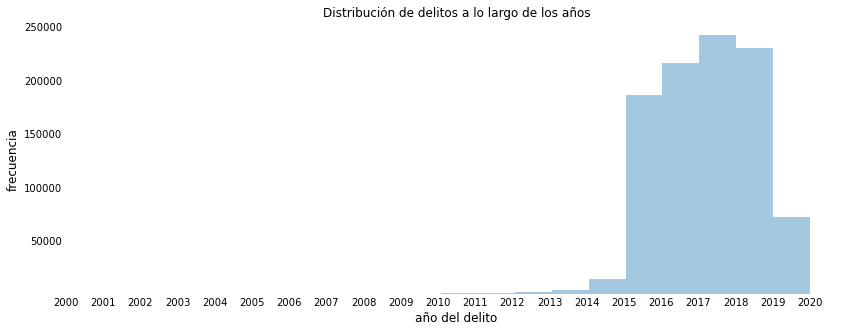

In [39]:
crimes_per_year = data_na_cleaned.groupby('ao_hechos').count()

fig,ax = plt.subplots(figsize = (14,5))                     #Se grafica y configura el histograma de la columna ao_hechos
sns.distplot(data_na_cleaned['ao_hechos'], bins = 115, kde = False)
ax.set_xlim(2000,2021)
ax.set_xticks(np.arange(2000,2021,1))
plt.title('Distribución de delitos a lo largo de los años')
plt.ylabel('frecuencia', fontsize = 12)
plt.xlabel('año del delito', fontsize = 12)
plt.box(False)
ax.tick_params(axis='both', which='both', length=0)
ax.set_yticks(np.arange(50000, 260000, 50000))
plt.show()


En el histograma se observa que la mayor parte de los delitos se cometió entre 2015 a 2020. Esto podría deberse a varias razones: que exista un incremento real en la tasa de delincuencia de la CDMX en los últimos años, que a los delitos antiguos ya no se les de seguimiento porque ya fueron resueltos, por falta de evidencia o porque se determinó que eran denuncias incorrectas, que los muy pocos delitos registrados antes del 2015 sean en realidad delitos más recientes que fueron introducidos a la base de datos con la fecha incorrecta, que las redes sociales y smartphones hayan facilitado la captura de evidencia y denuncia por parte de las víctimas en años recientes, a cambios en los lineamientos para el registro y actualización de las carpetas de delitos en la base de datos, entre otras. Además, se observa que la cantidad de delitos registrados durante 2020 es menor respecto a la de los años anteriores, lo cual es debido a que el año aún sigue en curso.

Por otro lado, en la siguiente gráfica de barras se muestran los 5 delitos con mayor ocurrencia en la CDMX entre 1906 a 2020 de acuerdo a los datos recopilados:

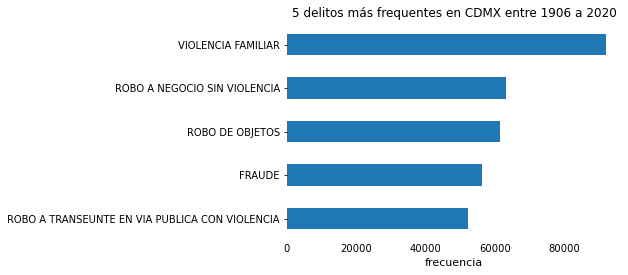

In [46]:
data_na_cleaned['delito'].value_counts().iloc[0:5].sort_values(ascending = True).plot.barh()
plt.title('5 delitos más frequentes en CDMX entre 1906 a 2020')
plt.xlabel('frecuencia', fontsize = 11)
plt.tick_params(axis='x', which='both', length=0)
plt.box(False)

Sorprende un poco que el delito más frecuente en los datos sea violencia familiar, ya que incluso si esto fuera cierto, muchos de los familiares afectados suelen evitar la denuncia por miedo de represalias o a perder su estabilidad. En realidad, si consideráramos a todos los tres delitos relacionados con robo dentro de una única categoria, ésta superaría con creces al número de delitos de violencia familiar.

Como los delitos están en su mayoría concentrados en los últimos 5 años, a partir de ahora solo analizaremos los datos correspondientes a los años 2016-2019 (se omite 2020 por aún seguir en curso). 

In [47]:
#Conjunto de datos correspondientes a los años 2016

data_5_years = data_na_cleaned.loc[(data_na_cleaned['ao_hechos'] >= 2016) & (data_na_cleaned['ao_hechos'] <= 2019), :]

A continuación se calcula la frecuencia promedio de los delitos en los últimos años, observándose como el orden entre los delitos de fraude y robo a transeuntes fue invertido, lo cual podría sugerir una alza en los delitos de asalto a mano armada y de carteristas durante los últimos años:

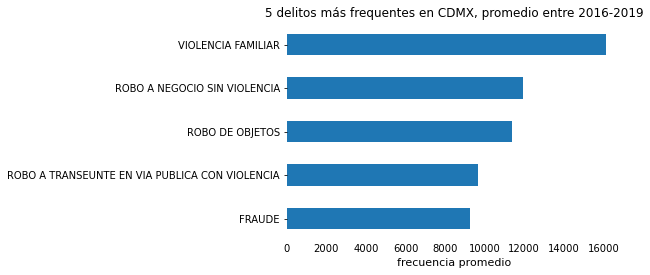

In [50]:
crime_dict = {}
years = [2015, 2016, 2017, 2018, 2019]
for year in years:
    for crime in data_5_years.loc[data_5_years['ao_hechos'] == year, 'delito'].unique():
        suma = 0
        suma += data_5_years.loc[data_5_years['ao_hechos'] == year, 'delito'].value_counts().loc[crime]
        if crime in crime_dict:
            crime_dict[crime] += suma
        else:
            crime_dict[crime] = suma
crime_series = pd.Series(crime_dict)/5 
crime_series.sort_values()[-5:].plot.barh()
plt.title('5 delitos más frequentes en CDMX, promedio entre 2016-2019')
plt.xlabel('frecuencia promedio', fontsize = 11)
plt.tick_params(axis='x', which='both', length=0)
plt.box(False)

## Pregunta 4): Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (tencuidado con los delitos con pocas ocurrencias).

Para responder esta pregunta, primero agregamos a los datos en función de los tipos de delitos para las filas correspondientes a los años 2018 y 2019, considerando delitos con una ocurrencia de 500 o más por año:

In [52]:
# Agregamos los datos del 2018 y 2019 usando la columna 'delito'
crimes_2018 = data_na_cleaned[data_na_cleaned['ao_hechos'] == 2018]
crimes_2019 = data_na_cleaned[data_na_cleaned['ao_hechos'] == 2019]
agg_2018, agg_2019 = crimes_2018.groupby('delito', as_index = True).count(), crimes_2019.groupby('delito', as_index=True).count()
index_intersect = agg_2018.index.intersection(agg_2019.index)
# Unicamente seleccionamos delitos con ocurrencia de 500 o más
bool_rising_trend = ((agg_2019.loc[index_intersect, 'ao_hechos'] - agg_2018.loc[index_intersect, 'ao_hechos']) > 0) & (agg_2019.loc[index_intersect, 'ao_hechos'] > 500) & (agg_2018.loc[index_intersect, 'ao_hechos'] > 500)
index_top_5 = index_intersect[bool_rising_trend]
top_5_increases = (agg_2019.loc[index_top_5, 'ao_hechos']- agg_2018.loc[index_top_5, 'ao_hechos']).sort_values(ascending = False).index[0:5]
bool_decreasing_trend = ((agg_2019.loc[index_intersect, 'ao_hechos'] - agg_2018.loc[index_intersect, 'ao_hechos']) < 0) & (agg_2019.loc[index_intersect, 'ao_hechos'] > 500) & (agg_2018.loc[index_intersect, 'ao_hechos'] > 500)
index_bottom_5 = index_intersect[bool_decreasing_trend]
top_5_decreases = (agg_2019.loc[index_bottom_5, 'ao_hechos']- agg_2018.loc[index_bottom_5, 'ao_hechos']).sort_values(ascending = True).index[0:5]

a continuación se muestran los delitos que incrementaron su incidencia entre 2018 y 2019 y su respectivo incremento:

In [19]:
(agg_2019.loc[index_top_5, 'ao_hechos']-agg_2018.loc[index_top_5, 'ao_hechos']).sort_values(ascending=False)

delito
VIOLENCIA FAMILIAR                                                    5606
AMENAZAS                                                              2611
USURPACIÓN DE IDENTIDAD                                                951
ROBO A REPARTIDOR CON VIOLENCIA                                        878
ABUSO SEXUAL                                                           874
TENTATIVA DE EXTORSION                                                 703
ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA                  537
LESIONES INTENCIONALES POR GOLPES                                      498
PRIVACION DE LA LIBERTAD PERSONAL                                      478
LESIONES CULPOSAS POR TRANSITO VEHICULAR                               418
ROBO DE MOTOCICLETA SIN VIOLENCIA                                      356
ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO CON VIOLENCIA            307
DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL                        282
EXTORSION         

para apreciar la tendencia con mayor claridad, se grafica el número de delitos correspondiente a cada año para los cinco delitos con mayor incremento:

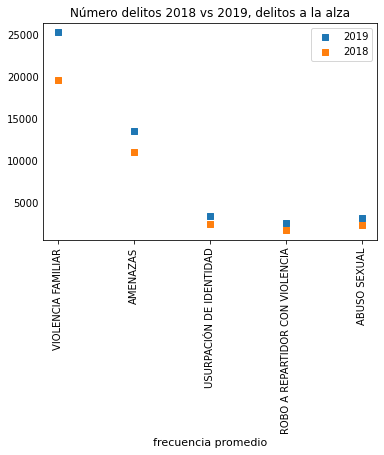

In [62]:
plt.scatter(top_5_increases, agg_2019.loc[top_5_increases, 'ao_hechos'], label = '2019', marker = 's')
plt.scatter(top_5_increases, agg_2018.loc[top_5_increases, 'ao_hechos'],label = '2018', marker = 's')
plt.legend()
plt.xticks(rotation = 90)
plt.title('Número delitos 2018 vs 2019, delitos a la alza')
plt.xlabel('frecuencia promedio', fontsize = 11)
plt.tick_params(axis='y', which='both', length=0)


y análogamente para los delitos que van en declive:

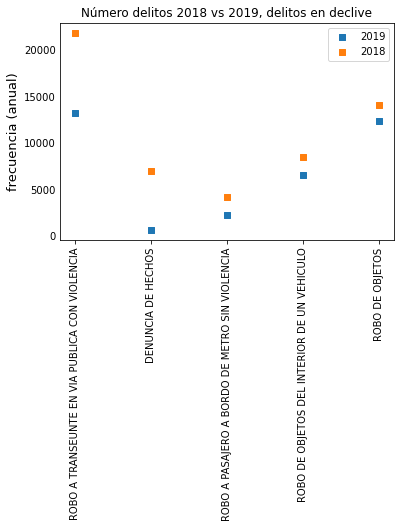

In [68]:
plt.scatter(top_5_decreases, agg_2019.loc[top_5_decreases, 'ao_hechos'], label = '2019', marker = 's')
plt.scatter(top_5_decreases, agg_2018.loc[top_5_decreases, 'ao_hechos'],label = '2018', marker = 's')
plt.legend()
plt.xticks(rotation = 90)
plt.title('Número delitos 2018 vs 2019, delitos en declive')
plt.ylabel('frecuencia (anual)', fontsize = 13)
plt.tick_params(axis='y', which='both', length=0)


de los resultados anteriores se puede concluir que hubo un incremento notable en el número de delitos de violencia familiar acontecidos en 2019 respecto al 2018, e incluso como ya se mencionó anteriormente podría estar relacionado al incremento en el número de amenazas. Por otro lado, se identificó que los delitos de tipo robo disminuyeron entre 2018 y 2019, aunque el decaimiento en el número de denuncias podría estar relacionado (por ejemplo, los robos se volvieron más violentos y por ende la gente ya no los denuncia igual que antes, reflejándose esto en los datos como una disminución neta de casos).

## Pregunta 4):  ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos?.¿Por qué crees que sea esto?.

In [75]:
# Número de delitos por delegación o alcaldía
crimes_16_19 = data_5_years.copy()
crimes_16_19.groupby('alcaldia_hechos').size().sort_values(ascending = False)

alcaldia_hechos
CUAUHTEMOC                137198
IZTAPALAPA                131379
GUSTAVO A MADERO           87310
BENITO JUAREZ              76871
COYOACAN                   59582
ALVARO OBREGON             59095
MIGUEL HIDALGO             58975
TLALPAN                    51316
VENUSTIANO CARRANZA        50935
AZCAPOTZALCO               43484
IZTACALCO                  37938
XOCHIMILCO                 27086
TLAHUAC                    19910
LA MAGDALENA CONTRERAS     13616
CUAJIMALPA DE MORELOS      12722
MILPA ALTA                  5738
dtype: int64

In [76]:
# Número de delitos en cada colonia de la delegación con más delitos, Cuauhtémoc
crimes_16_19.groupby(['alcaldia_hechos', 'colonia_hechos']).size().loc['CUAUHTEMOC'].sort_values(ascending = False)

colonia_hechos
CENTRO                         30866
DOCTORES                       16325
ROMA NORTE                     11484
JUÁREZ                          7918
BUENAVISTA                      7535
GUERRERO                        7512
SANTA MARIA LA RIBERA           5983
MORELOS                         4873
OBRERA                          4835
HIPÓDROMO                       4238
ROMA SUR                        4186
CUAUHTÉMOC                      4168
TABACALERA                      3014
SAN RAFAEL                      2953
NONOALCO TLATELOLCO             2627
PERALVILLO                      2341
TRANSITO                        1976
CONDESA                         1958
EX-HIPÓDROMO DE PERALVILLO      1556
ATLAMPA                         1479
SAN SIMÓN TOLNAHUAC             1438
VISTA ALEGRE                    1164
HIPÓDROMO CONDESA                907
ALGARIN                          857
AMPLIACIÓN ASTURIAS              837
BUENOS AIRES                     828
VALLE GÓMEZ            

Se observa como la delegación con más crímenes es Cuauhtémoc, seguida de muy cerca por la delegación Iztapalapa. Es probable que haya tantos crímenes en la colonia Cuauhtémoc debido al gran aforo de personas (sería interesante analizar estos datos actualizados post-COVID) por fines comerciales, de transporte y turísticos que hay en la zona centro y al alto nivel de desigualdad social entre sus colonias, haciéndola una zona muy atractiva para los delincuentes.

## 6) Dentro de cada alcaldía, cuáles son las tres colonias con más delitos


In [77]:
alcaldias = crimes_16_19['alcaldia_hechos'].unique()
top_3_colonias_per_alcaldia = {}

for alcaldia in alcaldias:
    top_3_colonias_per_alcaldia[alcaldia] = crimes_16_19.groupby(['alcaldia_hechos', 'colonia_hechos']).size().loc[alcaldia].sort_values(ascending = False).iloc[0:3]
    
    print(('En la alcaldía {0} las tres colonias con más delitos son: \n'+ ' '*75+'{1} ({4} delitos),\n'+' '*75+ '{2} ({5} delitos) y\n'+' '*75+'{3} ({6} delitos)')    \
    .format(alcaldia, top_3_colonias_per_alcaldia[alcaldia].keys()[0], top_3_colonias_per_alcaldia[alcaldia].keys()[1], top_3_colonias_per_alcaldia[alcaldia].keys()[2], \
    top_3_colonias_per_alcaldia[alcaldia].iloc[0], top_3_colonias_per_alcaldia[alcaldia].iloc[1], top_3_colonias_per_alcaldia[alcaldia].iloc[2]))

En la alcaldía CUAUHTEMOC las tres colonias con más delitos son: 
                                                                           CENTRO (30866 delitos),
                                                                           DOCTORES (16325 delitos) y
                                                                           ROMA NORTE (11484 delitos)
En la alcaldía GUSTAVO A MADERO las tres colonias con más delitos son: 
                                                                           LINDAVISTA (4161 delitos),
                                                                           GUADALUPE TEPEYAC (3686 delitos) y
                                                                           SAN FELIPE DE JESÚS (2623 delitos)
En la alcaldía IZTAPALAPA las tres colonias con más delitos son: 
                                                                           CENTRAL DE ABASTO (6118 delitos),
                                                              

## 7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la semana, quincenas)?

In [79]:
#Funciones que serán utilizadas para crear nuevas columnas para el análisis estacional

def month_classifier(val):
    if  1 <= val <= 3:
        return 'Enero-Marzo'
    elif 4 <= val <= 6:
        return 'Abril-Junio'
    elif 7 <= val <= 9:
        return 'Julio-Septiembre'
    else:
        return 'Octubre-Diciembre'

def week_classifier(val):
    if 1 <=val <= 10:
        return 'Primeros 10 días del Mes'
    elif 10 < val <= 20:
        return 'Entre los días 10-20 del Mes'
    else:
        return 'Después del día 20 del Mes'
    
def hour_classifier(val):
    if 0 <=val <= 6:
        return 'Madrugada'
    elif 6 < val <= 12:
        return 'Mañana'
    elif 12 < val <= 18:
        return 'Tarde'
    else:
        return 'Noche'

In [80]:
#Se crean las nuevas columnas usando las funciones anteriores

week_column = crimes_16_19['fecha_hechos'].dt.day.apply(week_classifier)
year_quarter_column = crimes_16_19['fecha_hechos'].dt.month.apply(month_classifier)
timeofday_column = crimes_16_19['fecha_hechos'].dt.hour.apply(hour_classifier)


crimes_16_19_mdy = crimes_16_19.copy()
crimes_16_19_mdy['tipo_semana'] = week_column
crimes_16_19_mdy['cuartos_ao'] = year_quarter_column
crimes_16_19_mdy['cuartos_dia'] = timeofday_column
crimes_16_19_mdy['dia_semana'] = crimes_16_19['fecha_hechos'].apply(lambda x: dt.datetime.weekday(x))

crimes_16_19_mdy.head()

ao_hechos  mes_hechos        fecha_hechos                           delito  \
0     2017.0  Septiembre 2017-09-30 23:00:00     ROBO A NEGOCIO CON VIOLENCIA   
1     2017.0  Septiembre 2017-09-30 22:00:00  DAÑO EN PROPIEDAD AJENA CULPOSA   
2     2017.0      Agosto 2017-08-31 11:43:00                  ROBO DE OBJETOS   
3     2017.0  Septiembre 2017-09-30 21:15:00      HOMICIDIO POR ARMA DE FUEGO   
4     2017.0  Septiembre 2017-09-12 12:00:00               ABUSO DE CONFIANZA   

               categoria_delito                            fiscalia agencia  \
0  ROBO A NEGOCIO CON VIOLENCIA         INVESTIGACIÓN EN CUAUHTEMOC   CUH-2   
1        DELITO DE BAJO IMPACTO  INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2   
2        DELITO DE BAJO IMPACTO         INVESTIGACIÓN EN IZTAPALAPA   IZP-4   
3              HOMICIDIO DOLOSO            INVESTIGACIÓN EN TLAHUAC   TLH-1   
4        DELITO DE BAJO IMPACTO         INVESTIGACIÓN EN IZTAPALAPA   IZP-4   

  unidad_investigacion   alcaldia_hechos                      colonia_hechos  \
0               UI-2CD        CUAUHTEMOC                              JUÁREZ   
1               UI-2CD  GUSTAVO A MADERO  RESIDENCIAL ACUEDUCTO DE GUADALUPE   
2               UI-2SD        IZTAPALAPA         LEYES DE REFORMA 3A SECCIÓN   
3               UI-2CD           TLAHUAC                           LA HABANA   
4               UI-2SD        IZTAPALAPA                      REAL DEL MORAL   

   ...  mes_inicio         fecha_inicio             calle_hechos   longitud  \
0  ...     Octubre  2017-10-01 00:12:26    VERSALLES Y  MARSELLA -99.155905   
1  ...     Octubre  2017-10-01 00:40:28                   BRISAS -99.147345   
2  ...     Octubre  2017-10-01 00:47:11        GUERRA DE REFORMA -99.068851   
3  ...     Octubre  2017-10-01 00:47:53           MIGUEL HIDALGO -98.996337   
4  ...     Octubre  2017-10-01 01:03:50  FERROCARRIL DE RIO FRIO -99.080072   

     latitud                      geopoint                   tipo_semana  \
0  19.426970   19.426970385,-99.1559051339    Después del día 20 del Mes   
1  19.525971  19.5259710139,-99.1473450714    Después del día 20 del Mes   
2  19.382600  19.3825998321,-99.0688509212    Después del día 20 del Mes   
3  19.267774  19.2677742376,-98.9963370068    Después del día 20 del Mes   
4  19.390447  19.3904466893,-99.0800721114  Entre los días 10-20 del Mes   

         cuartos_ao cuartos_dia dia_semana  
0  Julio-Septiembre       Noche          5  
1  Julio-Septiembre       Noche          5  
2  Julio-Septiembre      Mañana          3  
3  Julio-Septiembre       Noche          5  
4  Julio-Septiembre      Mañana          1  

[5 rows x 21 columns]

Se grafica primero el número de delitos promedio (2016-2019) ocurrido en cuatro distintas temporadas del año:

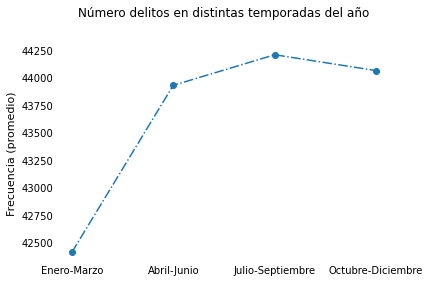

In [106]:
(crimes_16_19_mdy.groupby('cuartos_ao').size()/5).loc[['Enero-Marzo', 'Abril-Junio', 'Julio-Septiembre', 'Octubre-Diciembre']].plot(style = '-.o')
plt.title('Número delitos en distintas temporadas del año', y =1.1)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('')
plt.ylabel('Frecuencia (promedio)', fontsize = 11)
plt.box(False)

se aprecia como el número de delitos es máximo en el periodo Julio-Septiembre, lo cual podría deberse al periodo vacacional de verano cuando hay más gente en las calles, casas abandonadas y gente gastando.

Se grafican ahora los delitos dependiendo de la hora del día,

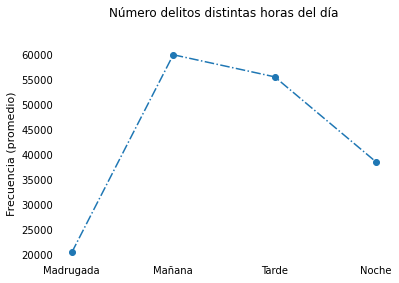

In [108]:
(crimes_16_19_mdy.groupby('cuartos_dia').size()/5).loc[['Madrugada', 'Mañana', 'Tarde', 'Noche']].plot(style = '-.o')
plt.title('Número delitos distintas horas del día', y =1.1)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('')
plt.ylabel('Frecuencia (promedio)', fontsize = 11)
plt.box(False)

observándose que en la mañana (entre las 6:00hrs y 12:00hrs) el número de incidentes delictivos es considerablemente mayor, lo cual es lógico ya que es cuando la gente utiliza el transporte público y cuándo el estado de alerta de muchas personas es menor por falta de sueño.

Se grafica ahora el número de delitos en función del día del mes:

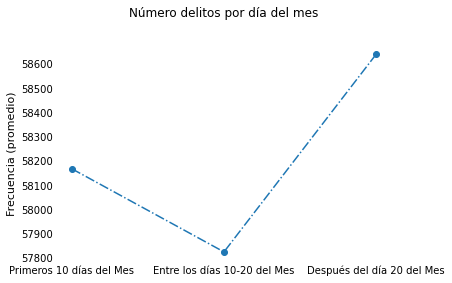

In [110]:
(crimes_16_19_mdy.groupby('tipo_semana').size()/5).loc[['Primeros 10 días del Mes', 'Entre los días 10-20 del Mes', 'Después del día 20 del Mes']].plot(style = '-.o')
plt.title('Número delitos por día del mes', y =1.1)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('')
plt.ylabel('Frecuencia (promedio)', fontsize = 11)
plt.box(False)

observándose que el número de delitos cae a un mínimo a mitad de mes pero incrementa significativamente antes de que éste finalice, lo cyal podría estar relacionado indirectamente con la época de quincena.

Por último, se grafican los delitos dependiendo del día de la semana,

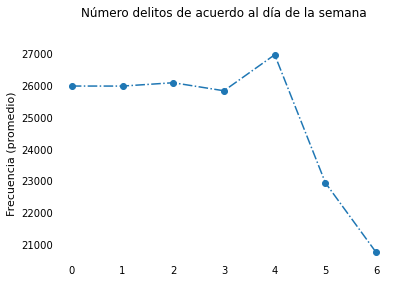

In [113]:
(crimes_16_19_mdy.groupby('dia_semana').size()/5).plot(style = '-.o')
plt.title('Número delitos de acuerdo al día de la semana', y =1.1)
plt.tick_params(axis='both', which='both', length=0)
plt.xlabel('')
plt.ylabel('Frecuencia (promedio)', fontsize = 11)
plt.box(False)

donde 0 es lunes, 1 es martes, etc. Se observa como la criminalidad adquiere un pico el viernes, tal y como se espera ya que en México la gente sale de fiestas, bares, citas y semejante durante ese día, además de que hay mucha gente viajando tanto hacia otros estados como gente entrante por cuestiones de trabajo o turismo, incrementándose radicalmente el uso del metro y metrobus.

## 8) ¿¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás

In [33]:
top_3_crimes_per_alcaldia = {}

for alcaldia in alcaldias:
    top_3_crimes_per_alcaldia[alcaldia] = crimes_16_19.groupby(['alcaldia_hechos', 'delito']).size().loc[alcaldia].sort_values(ascending = False).iloc[0:3]
    
    print(('En la alcaldía {0} los tres delitos más comunes son: \n'+ ' '*60+'{1} ({4} delitos),\n'+' '*60+ '{2} ({5} delitos) y\n'+' '*60+'{3} ({6} delitos)')    \
    .format(alcaldia, top_3_crimes_per_alcaldia[alcaldia].keys()[0], top_3_crimes_per_alcaldia[alcaldia].keys()[1], top_3_crimes_per_alcaldia[alcaldia].keys()[2], \
    top_3_crimes_per_alcaldia[alcaldia].iloc[0], top_3_crimes_per_alcaldia[alcaldia].iloc[1], top_3_crimes_per_alcaldia[alcaldia].iloc[2]))

En la alcaldía CUAUHTEMOC los tres delitos más comunes son: 
                                                            FRAUDE (11359 delitos),
                                                            ROBO DE OBJETOS (11220 delitos) y
                                                            ROBO A NEGOCIO SIN VIOLENCIA (9503 delitos)
En la alcaldía GUSTAVO A MADERO los tres delitos más comunes son: 
                                                            VIOLENCIA FAMILIAR (9013 delitos),
                                                            ROBO A NEGOCIO SIN VIOLENCIA (6356 delitos) y
                                                            ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA (4847 delitos)
En la alcaldía IZTAPALAPA los tres delitos más comunes son: 
                                                            VIOLENCIA FAMILIAR (15217 delitos),
                                                            ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA (96

Se observa claramente como el fraude es delito característico de la delegación Cuauhtémoc (muchos bancos y casas de empeño), el robo a negocio sin violencia es característico en la Benito Juárez, el robo de objetos caracteriza a la Miguel Hidalgo y en todas las demás delegaciones no hay delito característico como tal ya que prevalece la violencia familiar.

## 9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de población no esté actualizado)


In [114]:
#Importamos y limpiamos datos del INEGI 

ageb_pop_data = pd.read_csv('AGEB-2010.csv', encoding="latin-1").loc[:, ['mun', 'nom_mun', 'loc', 'nom_loc', 'ageb', 'pobtot']]
ageb_pop_data = ageb_pop_data.replace({'nom_mun':{'Álvaro Obregón': 'ALVARO OBREGON','Azcapotzalco':'AZCAPOTZALCO', 'Benito Juárez': 'BENITO JUAREZ', 'Coyoacán':'COYOACAN', 'Cuajimalpa de Morelos': 'CUAJIMALPA DE MORELOS', 'Cuauhtémoc':'CUAUHTEMOC', 'Gustavo A. Madero':'GUSTAVO A MADERO', 'Iztacalco': 'IZTACALCO', 'Iztapalapa': 'IZTAPALAPA', 'La Magdalena Contreras': 'LA MAGDALENA CONTRERAS', 'Miguel Hidalgo':'MIGUEL HIDALGO', 'Milpa Alta':'MILPA ALTA', 'Tlalpan': 'TLALPAN', 'Tláhuac':'TLAHUAC', 'Venustiano Carranza': 'VENUSTIANO CARRANZA', 'Xochimilco':'XOCHIMILCO'}})
ageb_pop_data.head()

mun                     nom_mun  loc                       nom_loc ageb  \
0    0  Total del Distrito Federal    0           Total de la entidad    0   
1    2                AZCAPOTZALCO    0           Total del municipio    0   
2    2                AZCAPOTZALCO    1  Total de la localidad urbana    0   
3    2                AZCAPOTZALCO    1             Total AGEB urbana   10   
4    2                AZCAPOTZALCO    1                  Azcapotzalco   10   

    pobtot  
0  8851080  
1   414711  
2   414711  
3     3424  
4      202

In [115]:
#Exploramos los datos del INEGI
ageb_pop_data_filtered = ageb_pop_data[ageb_pop_data['nom_loc'] == 'Total AGEB urbana'].copy()
ageb_pop_data_filtered[ageb_pop_data_filtered['ageb'] == '151']  

mun    nom_mun  loc            nom_loc ageb  pobtot
17959    6  IZTACALCO    1  Total AGEB urbana  151     280
43623   11    TLAHUAC    1  Total AGEB urbana  151    1736

Observamos que en los datos del INEGI puede haber AGEBs en dos delegaciones distintas compartiendo el mismo códico identificador. Esto sucede ya que, de acuerdo al manual de geoestadística del INEGI, los códigos identificadores son únicos solo hasta nivel municipio (delegación para el caso de CDMX). Entonces, para todos los AGEB duplicados, agregué a la cadena del código identificador un '-2' para hacer que cada AGEB tenga un identificador único y así poder agregar datos a nivel AGEB:

In [116]:
#Filtramos datos del INEGI para obtener la población de cada AGEB
duplicate_agebs = ageb_pop_data_filtered['ageb'].value_counts().loc[ageb_pop_data_filtered['ageb'].value_counts() == 2].index

for ageb in duplicate_agebs:
    dummy_set = ageb_pop_data_filtered.copy()
    reduced_data = dummy_set.loc[ageb_pop_data_filtered['ageb'] == ageb]
    index = reduced_data.index[1]
    ageb_str = dummy_set.loc[index, 'ageb'] + '-2'
    ageb_pop_data_filtered.loc[index, 'ageb'] = ageb_str
    

In [117]:
ageb_pop_data_filtered.loc[ageb_pop_data_filtered['ageb'] == '1631']  #Verificamos que ya no hay duplicados

mun           nom_mun  loc            nom_loc  ageb  pobtot
12814    5  GUSTAVO A MADERO    1  Total AGEB urbana  1631    3638

No encontré como calcular asociar a cada AGEB del conjunto de datos del INEGI con los datos sobre delitos, entonces para calcular el número de homicidios por 100,000 habitantes de cada AGEB primero calculé el número de habitantes en cada delegación,

In [118]:
#Población de cada delegación

pop_counties = ageb_pop_data_filtered.groupby('nom_mun')['pobtot'].sum().sort_index()
pop_counties

nom_mun
ALVARO OBREGON             726664
AZCAPOTZALCO               414711
BENITO JUAREZ              385439
COYOACAN                   620416
CUAJIMALPA DE MORELOS      183528
CUAUHTEMOC                 531831
GUSTAVO A MADERO          1185772
IZTACALCO                  384326
IZTAPALAPA                1815786
LA MAGDALENA CONTRERAS     238431
MIGUEL HIDALGO             372889
MILPA ALTA                 113872
TLAHUAC                    356315
TLALPAN                    641550
VENUSTIANO CARRANZA        430978
XOCHIMILCO                 407885
Name: pobtot, dtype: int64

el número de asesinatos promedio (2016-2019) en cada delegación, 

In [119]:
murder_counties = crimes_16_19[crimes_16_19['delito'].str.contains('HOMICIDIO')].groupby(['alcaldia_hechos', 'ao_hechos']).size().groupby('alcaldia_hechos').mean()
murder_counties

alcaldia_hechos
ALVARO OBREGON            125.00
AZCAPOTZALCO               64.75
BENITO JUAREZ              40.25
COYOACAN                   78.25
CUAJIMALPA DE MORELOS      32.00
CUAUHTEMOC                175.25
GUSTAVO A MADERO          247.00
IZTACALCO                  68.75
IZTAPALAPA                357.50
LA MAGDALENA CONTRERAS     26.50
MIGUEL HIDALGO             75.50
MILPA ALTA                 24.00
TLAHUAC                    65.25
TLALPAN                   125.75
VENUSTIANO CARRANZA       129.50
XOCHIMILCO                 70.00
dtype: float64

calculé el número de homicidios por 100,000 hab. en cada delegación:

In [120]:
murder_rate100k_counties = (murder_counties/pop_counties)*100000
murder_rate100k_counties

alcaldia_hechos
ALVARO OBREGON            17.201898
AZCAPOTZALCO              15.613283
BENITO JUAREZ             10.442638
COYOACAN                  12.612505
CUAJIMALPA DE MORELOS     17.436032
CUAUHTEMOC                32.952197
GUSTAVO A MADERO          20.830311
IZTACALCO                 17.888459
IZTAPALAPA                19.688443
LA MAGDALENA CONTRERAS    11.114327
MIGUEL HIDALGO            20.247312
MILPA ALTA                21.076296
TLAHUAC                   18.312448
TLALPAN                   19.600966
VENUSTIANO CARRANZA       30.047937
XOCHIMILCO                17.161700
dtype: float64

y asumí una distribución uniforme para los homicidios en cada AGEB, esto es, asumí que cada AGEB aporta al número de asesinatos de la delegación proporcionalmente a su población:

In [121]:
def murderFunction(row):
    global pop_counties
    global murder_counties
    return (row.loc['pobtot']/pop_counties.loc[row.loc['nom_mun']])*murder_rate100k_counties.loc[row.loc['nom_mun']]*100

#Agregamos a los datos del INEGI el num de homicidios por 100k de cada AGEB a la columna 'tasa_hom'
murder_rate_100k_ageb = ageb_pop_data_filtered.apply(murderFunction, axis = 1)
ageb_pop_data_filtered['tasa_hom'] = murder_rate_100k_ageb
ageb_pop_data_filtered

mun              nom_mun  loc            nom_loc  ageb  pobtot  \
3        2         AZCAPOTZALCO    1  Total AGEB urbana    10    3424   
30       2         AZCAPOTZALCO    1  Total AGEB urbana    25    5912   
76       2         AZCAPOTZALCO    1  Total AGEB urbana  003A    4638   
107      2         AZCAPOTZALCO    1  Total AGEB urbana    44    5007   
152      2         AZCAPOTZALCO    1  Total AGEB urbana    97    2260   
...    ...                  ...  ...                ...   ...     ...   
65543   17  VENUSTIANO CARRANZA    1  Total AGEB urbana  1488    1257   
65576   17  VENUSTIANO CARRANZA    1  Total AGEB urbana  1492    1013   
65608   17  VENUSTIANO CARRANZA    1  Total AGEB urbana  1505    2741   
65653   17  VENUSTIANO CARRANZA    1  Total AGEB urbana  151A    2352   
65695   17  VENUSTIANO CARRANZA    1  Total AGEB urbana  1524    4647   

        tasa_hom  
3      12.890876  
30     22.257844  
76     17.461414  
107    18.850647  
152     8.508580  
...          ...  
65543   8.763848  
65576   7.062672  
65608  19.110348  
65653  16.398227  
65695  32.399047  

[2432 rows x 7 columns]

Ahora pintaremos el mapa, pero como no pude relacionar a los AGEB con los datos de los delitos, lo que hice fue usar como indicador al número de habitantes por 100,000 habitantes de cada delegación en su lugar:

In [122]:
#Preparando datos para graficar
crimes_16_19 = crimes_16_19[crimes_16_19['latitud'] >0]
region_coord = ((crimes_16_19.longitud.min(),   crimes_16_19.longitud.max(), crimes_16_19.latitud.min(), crimes_16_19.latitud.max()))
print(region_coord)
map_cdmx = plt.imread(r'C:\Users\Dirac\Documents\OPI_examenDS\cdmx.png')

(-99.34276548023979, -98.946873060244, 19.0953539998347, 19.582489999832802)


In [123]:
#Asignando a cada fila del dataset de delitos su indicador de tasa de homicidios correspondiente
crimes_16_19['tasa_hom'] = np.zeros(len(crimes_16_19))
for county in murder_rate100k_counties.index:
    tasa = murder_rate100k_counties.loc[county]
    crimes_16_19.loc[crimes_16_19['alcaldia_hechos'] == county, 'tasa_hom'] = tasa

(19.0953539998347, 19.582489999832802)

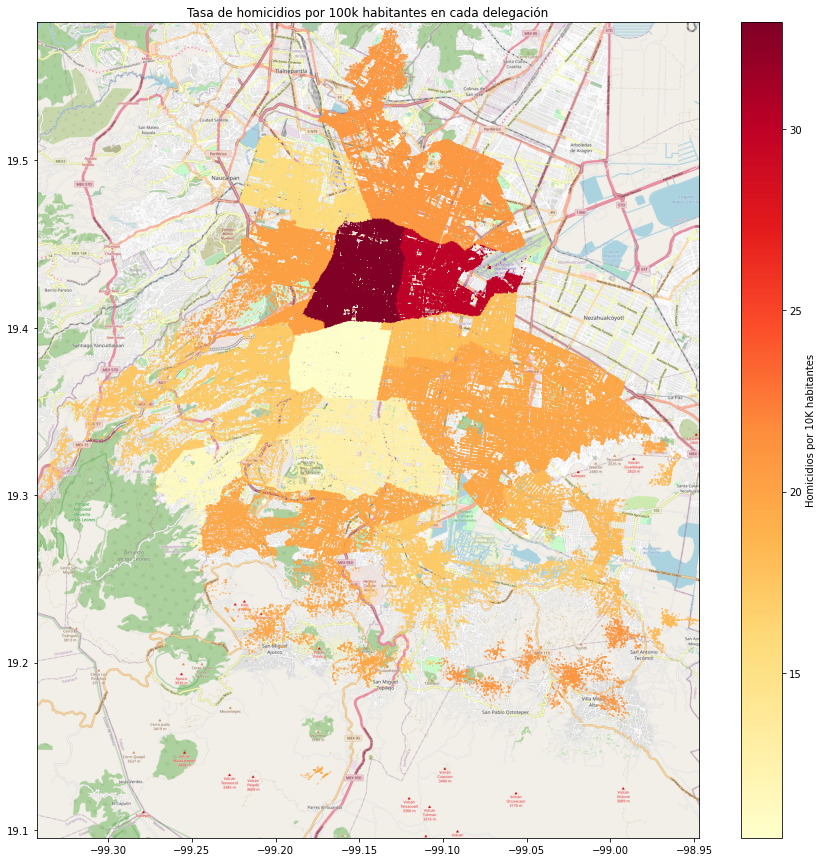

In [124]:
fig, ax = plt.subplots(figsize = (15,15))
colormap = plt.cm.YlOrRd
normalize = matplotlib.colors.Normalize()
im = ax.scatter(crimes_16_19.longitud, crimes_16_19.latitud, zorder=1, alpha= 1, c=crimes_16_19.tasa_hom, s=0.1, cmap = colormap)
ax.imshow(map_cdmx, zorder=0, extent = region_coord, aspect= 'equal')
ax.set_title('Tasa de homicidios por 100k habitantes en cada delegación')
fig.colorbar(im, ax=ax, label = 'Homicidios por 10K habitantes' )
ax.set_xlim(region_coord[0],region_coord[1])
ax.set_ylim(region_coord[2],region_coord[3])


Lamentablemente, no se pueden observar demasiados patrones en el mapa debido a que el nivel de desagregación a nivel delegación utilizado para la tasa de homicidios no es óptimo. Sin embargo, si se puede discernir como para cualquiera dos delegaciones adyacentes no hay un brinco muy radical en su tasa de homicidios entre una y otra, siendo la excepción a esto las dos colonias rojas del centro con alto nivel de asesinatos, lo cual podría indicar que lo que sea que causa los asesinatos está localizado en dicha región. 

## 10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel dedesagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.)

Lo que hice fue primero seleccionar como nivel de desagregación a las manzanas de la ciudad. Cuando alguien piensa en que una zona es insegura, generalmente piensa en delitos fuertes que atentan directamente a su persona sea por intrusión (robos persona a persona) o directamente a su salud y bienestar (asesinatos, secuestros y violaciones), por lo que escogí 4 tipos de delitos para el indicador: Robos, Secuestros, Violaciones y Asesinatos.

Para crear el indicador, traté de calcular el número de ocurrencias por persona de robos, secuestros, violaciones y asesinatos, cada uno por separado. Como no contaba con la población total de cada colonia, lo que hice fue asumir que la población total de cada delegación está distribuida uniformemente entre el número total de sus colonias.

Habiendo usado la anterior aproximación y calculado la tasa de ocurrencias de cada uno de los 4 delitos, sumé las 4 tasas para formar un único valor, el cual sería el indicador. Además, ordené a los 4 delitos por un "factor de severidad" (4 para asesinatos, 3 para secuestros, 2 para violaciones y 1 para robos) que a su vez multipliqué a cada uno de las tasas obtenidas.
Con el valor obtenido creé una nueva columna 'ind_crim' (índice de criminalidad), el cual a su vez normalicé entre 0 y 1.


In [125]:
#Cálculo de la tasa de incidencia de cada uno de los 4 crímenes a nivel colonia

theft_zone = crimes_16_19[crimes_16_19['delito'].str.contains('ROBO')].groupby(['colonia_hechos','alcaldia_hechos']).size()
num_colst = theft_zone.groupby('alcaldia_hechos').size()
theft_prop = theft_zone/([(pop_counties.loc[a]/num_colst.loc[a]) for c,a in theft_zone.index])

kidnapp_zone = crimes_16_19[crimes_16_19['delito'].str.contains('SECUESTRO')].groupby(['colonia_hechos','alcaldia_hechos']).size()
num_colsk = kidnapp_zone.groupby('alcaldia_hechos').size()
kidnapp_prop = kidnapp_zone/[(pop_counties.loc[a]/num_colsk.loc[a]) for c,a in kidnapp_zone.index]


rape_zone = crimes_16_19[crimes_16_19['delito'].str.contains('VIOLACION')].groupby(['colonia_hechos','alcaldia_hechos']).size()
num_colsr = rape_zone.groupby('alcaldia_hechos').size()
rape_prop = rape_zone/[(pop_counties.loc[a]/num_colsr.loc[a]) for c,a in rape_zone.index]


murder_zone = crimes_16_19[crimes_16_19['delito'].str.contains('HOMICIDIO')].groupby(['colonia_hechos','alcaldia_hechos']).size()
num_colsm = murder_zone.groupby('alcaldia_hechos').size()
murder_prop = murder_zone/[(pop_counties.loc[a]/num_colsm.loc[a]) for c,a in murder_zone.index]


In [126]:
#Multiplicar la tasa de incidencia por un factor de severiad

kidnapp_prop = kidnapp_prop*3     #Asesinatos es lo más grave (4) y robos lo menos grave (1)
rape_prop = rape_prop*2
murder_prop = murder_prop*4

#Preparación de datos
theft_prop = pd.Series({c:theft_prop.loc[c,a] for c, a in theft_prop.index})
kidnapp_prop = pd.Series({c:kidnapp_prop.loc[c,a] for c, a in kidnapp_prop.index})
rape_prop = pd.Series({c:rape_prop.loc[c,a] for c, a in rape_prop.index})
murder_prop = pd.Series({c:murder_prop.loc[c,a] for c, a in murder_prop.index})

In [315]:
#Función para crear columna con el indicador
def indCreator(row):
    total = 0
    if row['colonia_hechos'] in theft_prop.index:
        total += theft_prop.loc[row['colonia_hechos']]
    
    if row['colonia_hechos'] in kidnapp_prop.index:
        total += kidnapp_prop.loc[row['colonia_hechos']]
        
    if row['colonia_hechos'] in rape_prop.index:
        total += rape_prop.loc[row['colonia_hechos']]
        
    if row['colonia_hechos'] in murder_prop.index:
        total += murder_prop.loc[row['colonia_hechos']]
    return total 

#Datos de delitos con la nueva columna con el indicador de criminalidad
crimes_16_19['ind_crim'] = crimes_16_19.apply(indCreator, axis = 1)
crimes_16_19.head()

ao_hechos  mes_hechos        fecha_hechos                           delito  \
0     2017.0  Septiembre 2017-09-30 23:00:00     ROBO A NEGOCIO CON VIOLENCIA   
1     2017.0  Septiembre 2017-09-30 22:00:00  DAÑO EN PROPIEDAD AJENA CULPOSA   
2     2017.0      Agosto 2017-08-31 11:43:00                  ROBO DE OBJETOS   
3     2017.0  Septiembre 2017-09-30 21:15:00      HOMICIDIO POR ARMA DE FUEGO   
4     2017.0  Septiembre 2017-09-12 12:00:00               ABUSO DE CONFIANZA   

               categoria_delito                            fiscalia agencia  \
0  ROBO A NEGOCIO CON VIOLENCIA         INVESTIGACIÓN EN CUAUHTEMOC   CUH-2   
1        DELITO DE BAJO IMPACTO  INVESTIGACIÓN EN GUSTAVO A. MADERO   GAM-2   
2        DELITO DE BAJO IMPACTO         INVESTIGACIÓN EN IZTAPALAPA   IZP-4   
3              HOMICIDIO DOLOSO            INVESTIGACIÓN EN TLAHUAC   TLH-1   
4        DELITO DE BAJO IMPACTO         INVESTIGACIÓN EN IZTAPALAPA   IZP-4   

  unidad_investigacion   alcaldia_hechos                      colonia_hechos  \
0               UI-2CD        CUAUHTEMOC                              JUÁREZ   
1               UI-2CD  GUSTAVO A MADERO  RESIDENCIAL ACUEDUCTO DE GUADALUPE   
2               UI-2SD        IZTAPALAPA         LEYES DE REFORMA 3A SECCIÓN   
3               UI-2CD           TLAHUAC                           LA HABANA   
4               UI-2SD        IZTAPALAPA                      REAL DEL MORAL   

   ao_inicio mes_inicio         fecha_inicio             calle_hechos  \
0     2017.0    Octubre  2017-10-01 00:12:26    VERSALLES Y  MARSELLA   
1     2017.0    Octubre  2017-10-01 00:40:28                   BRISAS   
2     2017.0    Octubre  2017-10-01 00:47:11        GUERRA DE REFORMA   
3     2017.0    Octubre  2017-10-01 00:47:53           MIGUEL HIDALGO   
4     2017.0    Octubre  2017-10-01 01:03:50  FERROCARRIL DE RIO FRIO   

    longitud    latitud                      geopoint   tasa_hom  ind_crim  
0 -99.155905  19.426970   19.426970385,-99.1559051339  32.952197  0.250760  
1 -99.147345  19.525971  19.5259710139,-99.1473450714  20.830311  0.042803  
2 -99.068851  19.382600  19.3825998321,-99.0688509212  19.688443  0.161927  
3 -98.996337  19.267774  19.2677742376,-98.9963370068  18.312448  0.046552  
4 -99.080072  19.390447  19.3904466893,-99.0800721114  19.688443  0.018585

## 11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de Machine Learning no supervisados). a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en común?

In [316]:
max_ind =crimes_16_19['ind_crim'].max()
min_ind = crimes_16_19['ind_crim'].min()
crimes_16_19['ind_crim'] = crimes_16_19['ind_crim'].apply(lambda x : (x -min_ind)/(max_ind-min_ind) )

Ahora, usaremos el algoritmo KMeans clustering aplicado a todas las filas donde el índice de criminalidad que creamos sea mayor a 0.5, que debería ser correspondiente a las zonas más inseguras de la ciudad. Podría haber problemas debido a que KMeans usa distancia Euclideana para medir distancias y cuando se usan latitudes y longitudes se debe usar la norma de "Haverside".

(-99.25, -99.05)

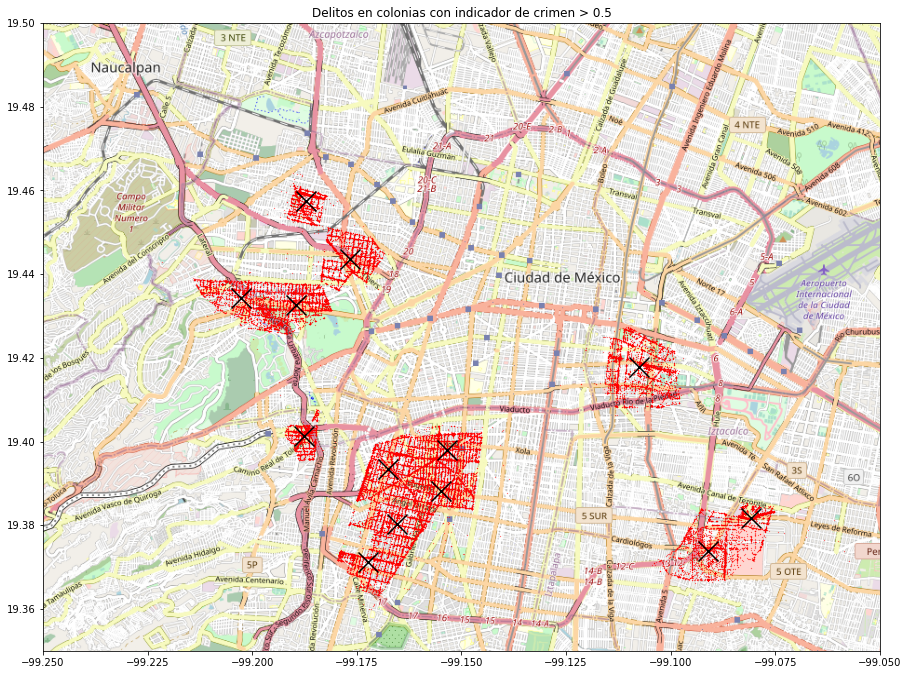

In [376]:
from sklearn.cluster import KMeans

danger_data = crimes_16_19[crimes_16_19['ind_crim'] > 0.5]
kmeans = KMeans(n_clusters=13, random_state=0).fit(danger_data[['latitud', 'longitud']])

fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], s = 400, color = 'black', zorder=2, marker = 'x', alpha = 1)
ax.scatter(danger_data.longitud, danger_data.latitud, zorder=1, alpha= 1, c='r', s=0.05)
ax.imshow(map_cdmx, zorder=0, extent = region_coord, aspect= 'equal')
ax.set_title('Delitos en colonias con indicador de crimen > 0.5')
ax.set_ylim(19.35, 19.5)
ax.set_xlim(-99.25,-99.05)

Se observa que todas los clusters están cerca de avenidas principales muy concurridas (Churubusco, periférico, insurgentes). Además, la mayoría de los clusters están al lado de al menos otro cluster lo cual podría indicar que la inseguridad "se propaga" entre zonas adyacentes. 

## 11) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos delitos?

Text(0, 0.5, 'Latitud')

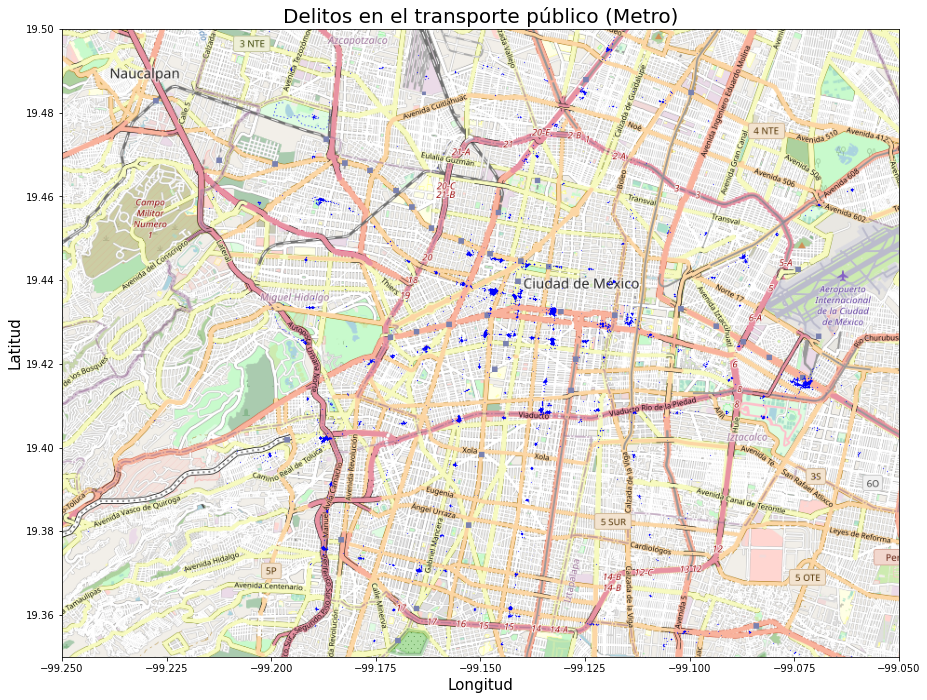

In [381]:
theft_public_transport = crimes_16_19[crimes_16_19['categoria_delito'] == 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA']
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(theft_public_transport.longitud, theft_public_transport.latitud, zorder=1, alpha= 1, c='blue', s=0.05)
ax.imshow(map_cdmx, zorder=0, extent = region_coord, aspect= 'equal')
ax.set_title('Delitos en el transporte público (Metro)', fontsize = 20)
ax.set_ylim(19.35, 19.5)
ax.set_xlim(-99.25,-99.05)
ax.set_xlabel('Longitud', fontsize = 15)
ax.set_ylabel('Latitud', fontsize = 15)

En mi caso tomé solo los delitos en líneas del metro porque no soy bueno identificando las líneas del metrobus (soy foráneo). 
Se observa en el mapa como los delitos prevalecen en las líneas 1,2 y 8 del metro. Además hay una gran concentración de delitos cerca del Aeropuerto (estación Zaragoza?) y varias de las estaciones de metro que pasan por las líneas ya mencionadas y el centro.